In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

In [2]:
train_data = pd.read_csv("input/loan.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train = train_data.drop(columns=['Loan_ID'])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income',
                'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History','Property_Area',
                'Loan_Status']
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [7]:
train_df=train.dropna(how='any')
train_df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head(200)

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1668,3890.0,201.0,360.0,0.0,1,1,0,0,0,1,0,1,0,0
251,3427,0.0,138.0,360.0,1.0,0,0,0,1,0,0,0,0,1,0
252,2583,2167.0,104.0,360.0,1.0,1,0,0,0,0,1,1,0,0,1
253,2661,7101.0,279.0,180.0,1.0,1,1,1,0,0,1,0,1,0,1


In [9]:
X = train_df_encoded[['Married_Yes', 'Dependents_1','Dependents_2','Dependents_3+', 'Education_Not Graduate', 
                      'Self_Employed_Yes','Applicant_Income','Coapplicant_Income', 'Loan_Amount','Credit_History',
                      'Property_Area_Semiurban','Property_Area_Urban']]
y = train_df_encoded["Loan_Status_Y"].values.reshape(-1, 1)
print(X.shape, y.shape)

(480, 12) (480, 1)


In [10]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Applicant_Income         480 non-null    int64  
 1   Coapplicant_Income       480 non-null    float64
 2   Loan_Amount              480 non-null    float64
 3   Loan_Amount_Term         480 non-null    float64
 4   Credit_History           480 non-null    float64
 5   Gender_Male              480 non-null    uint8  
 6   Married_Yes              480 non-null    uint8  
 7   Dependents_1             480 non-null    uint8  
 8   Dependents_2             480 non-null    uint8  
 9   Dependents_3+            480 non-null    uint8  
 10  Education_Not Graduate   480 non-null    uint8  
 11  Self_Employed_Yes        480 non-null    uint8  
 12  Property_Area_Semiurban  480 non-null    uint8  
 13  Property_Area_Urban      480 non-null    uint8  
 14  Loan_Status_Y            4

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.667582161168681
Validation Mean Accuracy:  0.7138888888888888


In [15]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
#Gender Loan Status
train_gender_df = train_df.groupby(['Gender','Loan_Status']).size().unstack().fillna(0)
train_gender_df

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


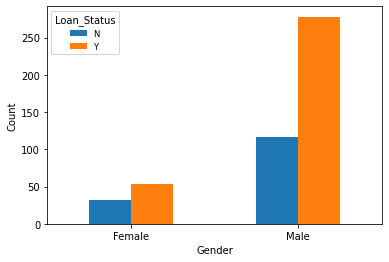

In [18]:
train_gender_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.savefig('Gender_graph.png')
plt.show()

In [19]:
#Married Loan Status
train_married_df = train_df.groupby(['Married','Loan_Status']).size().unstack().fillna(0)
train_married_df

Loan_Status,N,Y
Married,,
No,64,105
Yes,84,227


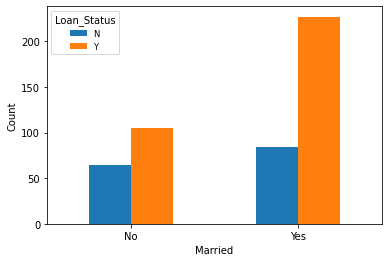

In [20]:
train_married_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Married')
plt.ylabel('Count')
#plt.savefig('Married_graph.png')
plt.show()

In [21]:
#Dependents Loan Status
train_dependents_df = train_df.groupby(['Dependents','Loan_Status']).size().unstack().fillna(0)
train_dependents_df

Loan_Status,N,Y
Dependents,,
0,87,187
1,28,52
2,20,65
3+,13,28


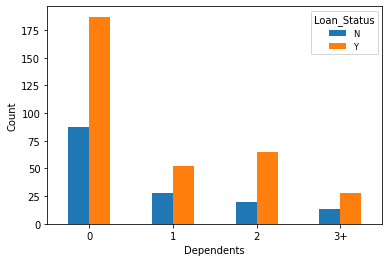

In [22]:
train_dependents_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Dependents')
plt.ylabel('Count')
#plt.savefig('Dependents_graph.png')
plt.show()

In [23]:
#Education Loan Status
train_edu_df = train_df.groupby(['Education','Loan_Status']).size().unstack().fillna(0)
train_edu_df

Loan_Status,N,Y
Education,,
Graduate,112,271
Not Graduate,36,61


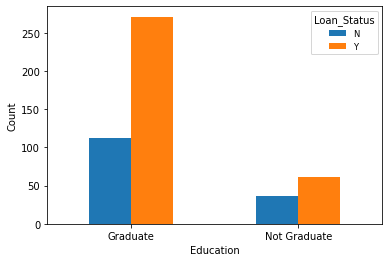

In [24]:
train_edu_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Education')
plt.ylabel('Count')
#plt.savefig('Education_graph.png')
plt.show()

In [25]:
#Self Employed Loan Status
train_selfemp_df = train_df.groupby(['Self_Employed','Loan_Status']).size().unstack().fillna(0)
train_selfemp_df

Loan_Status,N,Y
Self_Employed,,
No,125,289
Yes,23,43


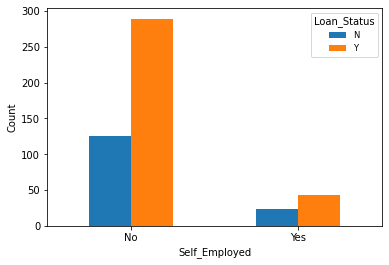

In [26]:
train_selfemp_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Self_Employed')
plt.ylabel('Count')
#plt.savefig('SelfEmployed_graph.png')
plt.show()

In [27]:
#Property_Area Loan Status
train_area_df = train_df.groupby(['Property_Area','Loan_Status']).size().unstack().fillna(0)
train_area_df

Loan_Status,N,Y
Property_Area,,
Rural,54,85
Semiurban,42,149
Urban,52,98


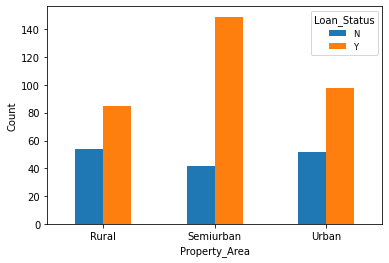

In [28]:
train_area_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Property_Area')
plt.ylabel('Count')
#plt.savefig('Property_Area_graph.png')
plt.show()

In [29]:
#Credit_History Loan Status
train_credit_df = train_df.groupby(['Credit_History','Loan_Status']).size().unstack().fillna(0)
train_credit_df

Loan_Status,N,Y
Credit_History,,
0.0,63,7
1.0,85,325


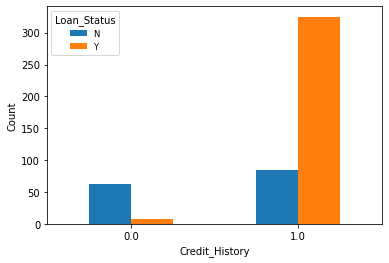

In [30]:
train_credit_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Credit_History')
plt.ylabel('Count')
#plt.savefig('Credit_History_graph.png')
plt.show()

In [31]:
#Loan_Amount_Term Loan Status
train_term_df = train_df.groupby(['Loan_Amount_Term','Loan_Status']).size().unstack().fillna(0)
train_term_df

Loan_Status,N,Y
Loan_Amount_Term,,
36.0,2.0,0.0
60.0,0.0,2.0
84.0,1.0,2.0
120.0,0.0,3.0
180.0,12.0,24.0
240.0,1.0,1.0
300.0,5.0,4.0
360.0,119.0,292.0
480.0,8.0,4.0


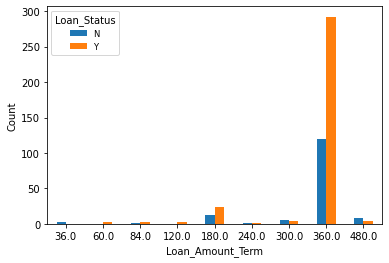

In [32]:
train_term_df.plot(kind = 'bar', rot = 0)
plt.legend( title='Loan_Status', loc=0, fontsize='small', fancybox=True)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
#plt.savefig('Term_graph.png')
plt.show()

The r-squared is: 0.24533158606923242


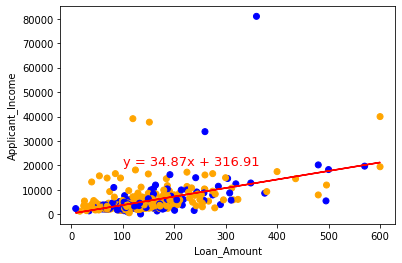

In [53]:
x_values = train_df['Loan_Amount']
y_values = train_df['Applicant_Income']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c = train_df['Loan_Status'].map({'Y':'orange','N':'blue'}))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,20000),fontsize=13,color="red")

plt.xlabel('Loan_Amount')
plt.ylabel('Applicant_Income')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig('LoanAmount_vs_ApplicantIncome.png')
plt.show()

#This graph tells that applicants with greater income generally applay for greater amount of loan (weak positive correlation), 
# so the applicants' income do not become the absolute measure for approval (no pattern on loan status).